In [3]:
import matplotlib.pyplot as plt
from astropy.io import ascii
import random
import numpy as np
import math

In [4]:
class Kmean:
    def __init__(self,data,init='rand',C=3):
        #saving initlaizion params
        self.data=data
        self.init=init
        self.C=C
        self.data['y']=-1 #giving my data frame a column of labels for all -1
        self.colors=['r','g','b','cyan','magenta','purple','k'] #list of colors for consoistancy
        self.Cov=np.cov(list(self.data.values())) #calculating covanacince
        if self.init=='rand': # Case for random
            self.Random()
            self.mean()
        elif self.init=='forgy': #case for Forgy
            self.Forgy()
            self.cluster() #cluster to asign labels 
        elif self.init=='K++': #case for K mean ++
            self.Kpp()
            self.cluster() #cluster to asign labels 
        else: #fall back case
            print('Initialization type not recognized defaulting to K++')
            self.init='K++'
            self.Random()
            self.mean()
            self.cluster() #cluster to asign labels 
    def Random(self): #Random init
            self.mu=[[-1,-1]]*self.C #allocating an empy array
            y=np.random.randint(0,self.C,len(self.data['y'])) #assigning ranomly labels
            test=1
            for i in range(self.C):
                test*=len(np.where(y==i)[0])#testing for empty group
            if test==0:
                while test==0:
                    y=np.random.randint(0,self.C,len(self.data['y']))
                    test=1
                    for i in range(self.C):
                        test*=len(np.where(y==i)[0])
            self.data['y']=y
    def Forgy(self):
        self.mu=[]
        sample=[]
        while len(np.unique(sample))!=self.C:
            sample=np.random.randint(0,len(self.data),self.C) #picking random samples to be the means
        for a in sample:
            muk=list(self.data['col1','col2'][a].values()) #apending the smaples into the list 
            self.mu.append(muk)       
    def Kpp(self):
        self.mu=[]
        self.mu.append(self.data['col1','col2'][np.random.randint(0,len(self.data))])# picking one random sample to be fit average
        while len(self.mu) < self.C:
            prob=np.zeros(len(self.data)) #creating empty array for proabilities
            for i in range(len(self.data)):
                t=[0]*len(self.mu) #creating empty array for distnace to each average
                for k in range(len(self.mu)):
                    t[k]=self.Dist2(self.data['col1','col2'][i],self.mu[k])**2 # calculating distnaces
                prob[i]=min(t) # picking smallest distnce for label
            prob/=sum(prob)#nomalizing poablities to sum to 1
            s=np.random.choice(np.arange(0,len(prob),1),p=prob) #picking ranom point with probliites of disnaces
            self.mu.append(self.data['col1','col2'][s])#appending new mean
    def Dist2(self,x,y):
        d=0#definding d
        if len(x)==len(y): #chicking for equal length
            for z in range(len(y)):
                d+=(x[z]-y[z])**2 #claulatnig each distnace step
        return np.sqrt(d)
    def cluster(self):
        for i in range(len(self.data)):
            t=[0]*self.C
            for k in range(self.C):
                t[k]=self.Dist2(self.data['col1','col2'][i],self.mu[k])**2 #calculating distances
            self.data[i]['y']=np.argmin(t) #labeling with closest mean
    def mean(self):
        for c in range(self.C):
            z=np.where(self.data['y']==c) #finding range for each label
            muk=[np.mean(self.data[z]['col1']),np.mean(self.data[z]['col2'])] #finding mean 
            self.mu[c]=muk 
    def Loss(self,norm=False):
        E=0
        for c in range(self.C):
            z=np.where(self.data['y']==c)
            for i in z[0]:
                E+=self.Dist2(self.data['col1','col2'][i],self.mu[c])#calculating error for each datapoint
        E/=len(self.data) #taking avearge
        if norm:
            return E/np.trace(self.Cov) #normalizing
        else:
            return(E)
    def plot(self):
        for i in range(len(self.data)):
            plt.scatter(self.data[i]['col1'],self.data[i]['col2'],color=self.colors[self.data[i]['y']]) #plotting points
        for c in range(self.C):
            plt.scatter(self.mu[c][0],self.mu[c][1],marker='*',color=self.colors[c],edgecolors='y') #plotting averages 
        plt.show()
    def run(self,itt=100):
        for i in range(itt):
            self.oldmu=self.mu.copy() #copying mu
            self.cluster()# asigning labels
            self.mean()#taking new mean
            if self.oldmu==self.mu: #convergnce clause
                print('Convergence Reached',i,' Itterations')
                break
        if i ==itt-1:
            print('Max Itteration Reached') #itteratioin clause

In [5]:
three=ascii.read('three.csv') # reading in Three dataset

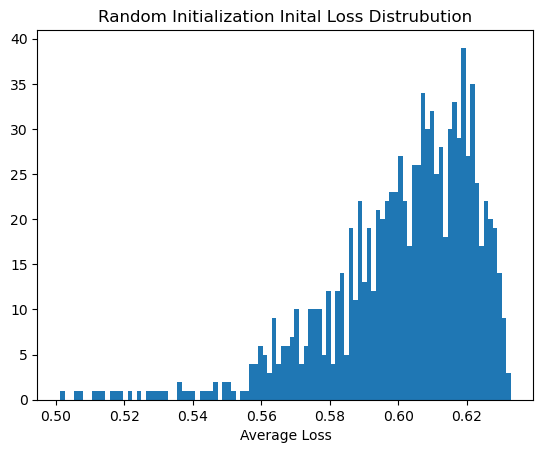

In [6]:
randloss=[]#emty array for losses
for i in range(1000):   #itterating 1000 times 
    K=Kmean(three,init='rand') #initilaizing k means with random
    randloss.append(K.Loss()) #appendeing loss into loss array
#plotting histrogram
plt.title('Random Initialization Inital Loss Distrubution')
plt.xlabel('Average Loss')
plt.hist(randloss,100)
plt.savefig('Images/Random.png',dpi=300)

plt.show()

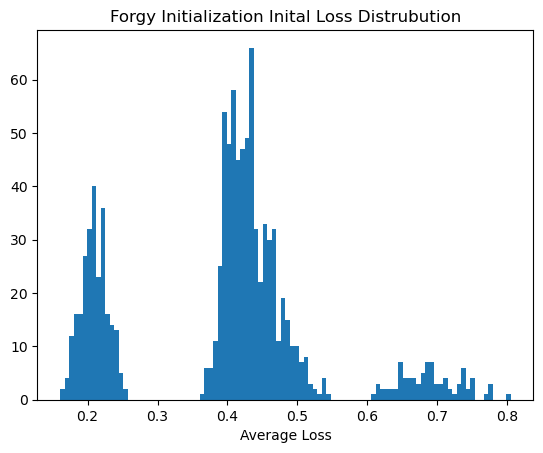

In [7]:
forgyloss=[]#empty array for losses
for i in range(1000):    
    K=Kmean(three,init='forgy') #initaliaing this time with forgy
    forgyloss.append(K.Loss())
plt.title('Forgy Initialization Inital Loss Distrubution')
plt.xlabel('Average Loss')    
plt.hist(forgyloss,100)
plt.savefig('Images/Forgy.png',dpi=300)
plt.show()

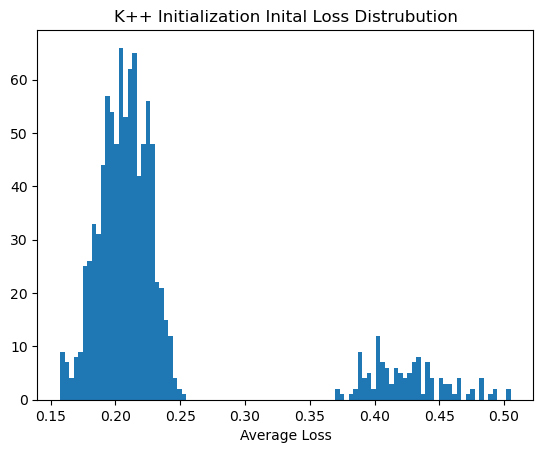

In [8]:
kpploss=[]
for i in range(1000):    
    K=Kmean(three,init='K++') #initaliazing with K++
    kpploss.append(K.Loss())
plt.title('K++ Initialization Inital Loss Distrubution')
plt.xlabel('Average Loss')
plt.hist(kpploss,100)
plt.savefig('Images/K++.png',dpi=300)
plt.show()

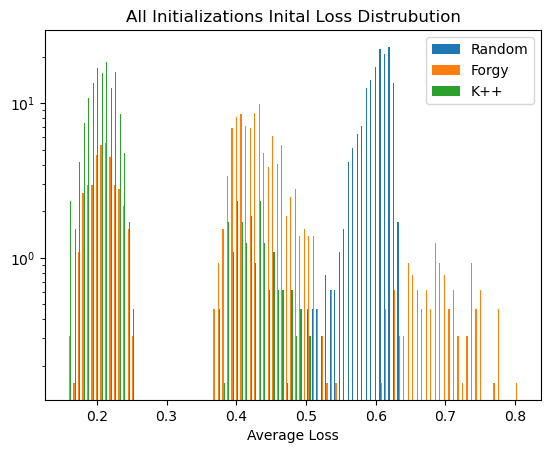

In [9]:
plt.hist((randloss,forgyloss,kpploss),100,density=True,log=True,label=['Random','Forgy','K++'])
plt.title('All Initializations Inital Loss Distrubution')
plt.xlabel('Average Loss')
plt.legend()
plt.savefig('Images/All.png',dpi=300)
plt.show()